## Quantum Teleportation
Quantum teleportation is a process by which the quantum state of a particle (e.g., a qubit) is transferred from one location to another without physically moving the particle itself. This process relies on the phenomenon of quantum entanglement and classical communication, and it is a fundamental protocol in quantum information science.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [2]:
# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Step 1: Create an entangled pair between qubit 1 and qubit 2
qc.h(1)
qc.cx(1, 2)

# Step 2: Prepare qubit 0 in the state to be teleported
qc.x(0)

# Step 3: Perform Bell measurement on qubit 0 and qubit 1
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

# Step 4: Apply conditional operations based on the measurement outcomes
qc.cx(1, 2)
qc.cz(0, 2)

# Measure the teleported qubit
qc.measure(2, 2)

# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

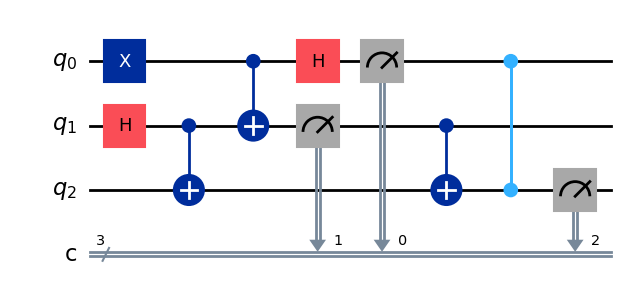

In [3]:
# Draw the circuit
qc.draw('mpl')

Counts: {'100': 287, '101': 244, '111': 251, '110': 242}


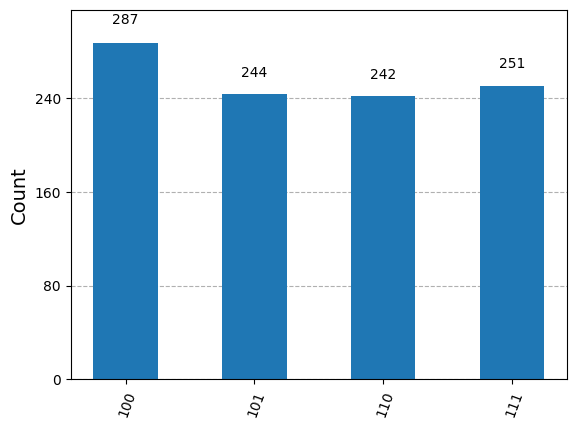

In [4]:
# Get the counts of outcomes
counts = result.get_counts()
print("Counts:", counts)

# Visualize the results
plot_histogram(counts)